In [1]:
import pandas as pd
import csv
import numpy as np

In [2]:
data = pd.read_csv('heart_disease.csv')
#selecting categorical features:
data = data[['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']]
data.head(6)

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,4.0,0,0.0,0,0,0,0
1,0,2.0,0,0.0,0,0,0,0
2,1,1.0,1,0.0,0,0,0,0
3,0,3.0,1,0.0,0,1,0,1
4,0,3.0,1,0.0,0,0,0,0
5,0,2.0,0,0.0,0,1,0,0


In [18]:
data['TenYearCHD'].isna().sum()

0

In [22]:
#cleaning data:
data['prevalentStroke'].fillna(0,inplace=True)
data['education'].fillna(0,inplace=True)
data['BPMeds'].fillna(0,inplace=True)

In [23]:
from sklearn.feature_selection import chi2
x = data.drop(columns=['prevalentStroke'],axis=1)
y = data['prevalentStroke']
chi_scores = chi2(x,y)
chi_scores


(array([4.99985189e-02, 2.18961612e+00, 2.33308807e+00, 5.40379896e+01,
        1.63616804e+01, 1.99397583e-01, 1.37307671e+01]),
 array([8.23065851e-01, 1.38943940e-01, 1.26650407e-01, 1.96650476e-13,
        5.23326393e-05, 6.55207539e-01, 2.10969986e-04]))

<Axes: >

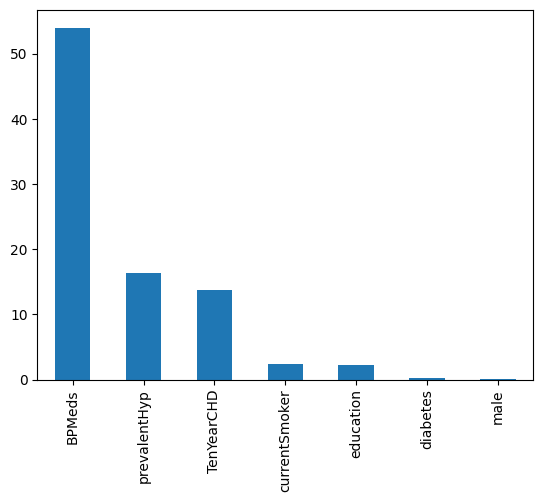

In [24]:
chi_values = pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()